[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/renatslarg/deep-learning-image-classification/blob/main/Deep_Learning_Redes_Densas.ipynb)

# Deep Learning - Redes Densas - Aplicación (Ramírez, Cesar Renato)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

## Cargar Librerías

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Cargar y visualizar el dataset

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_lfw_people

# Utilizaremos solo imagenes de las 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (62, 47)
n_samples: 1288
n_classes: 7


In [ ]:
# Mostrar el mapeo de las clases
for index, name in enumerate(target_names):
    print(f"Clase {index}: {name}")

Clase 0: Ariel Sharon
Clase 1: Colin Powell
Clase 2: Donald Rumsfeld
Clase 3: George W Bush
Clase 4: Gerhard Schroeder
Clase 5: Hugo Chavez
Clase 6: Tony Blair


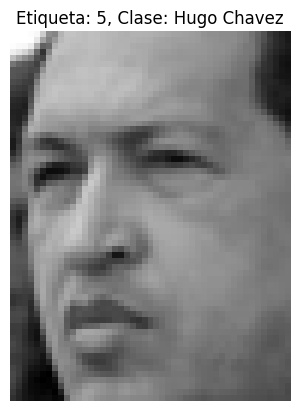

In [ ]:
# Mostrar la primera imagen en el conjunto de datos
plt.imshow(X[0], cmap='gray')  # Mostrar la imagen en escala de grises
plt.title(f"Etiqueta: {y[0]}, Clase: {target_names[y[0]]}")
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
X[0] # Valores de la primera imagen

array([[0.9973857 , 0.9973857 , 0.99607843, ..., 0.26928106, 0.23267974,
        0.20261438],
       [0.9973857 , 0.99607843, 0.99477124, ..., 0.275817  , 0.24052288,
        0.20915033],
       [0.9882353 , 0.97647065, 0.96732026, ..., 0.26928106, 0.24052288,
        0.21830066],
       ...,
       [0.3372549 , 0.2784314 , 0.20522876, ..., 0.4117647 , 0.39869282,
        0.37908497],
       [0.30980393, 0.2522876 , 0.19738562, ..., 0.39607847, 0.39607844,
        0.37254906],
       [0.28496733, 0.24705882, 0.19869281, ..., 0.38431373, 0.3869281 ,
        0.3803922 ]], dtype=float32)

In [ ]:
y[0] # Clase de la primera imagen

5

In [ ]:
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=8)  # Reducir tamaño del texto si necesario
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return f"#: {y}, Clase: {target_names[y]}"

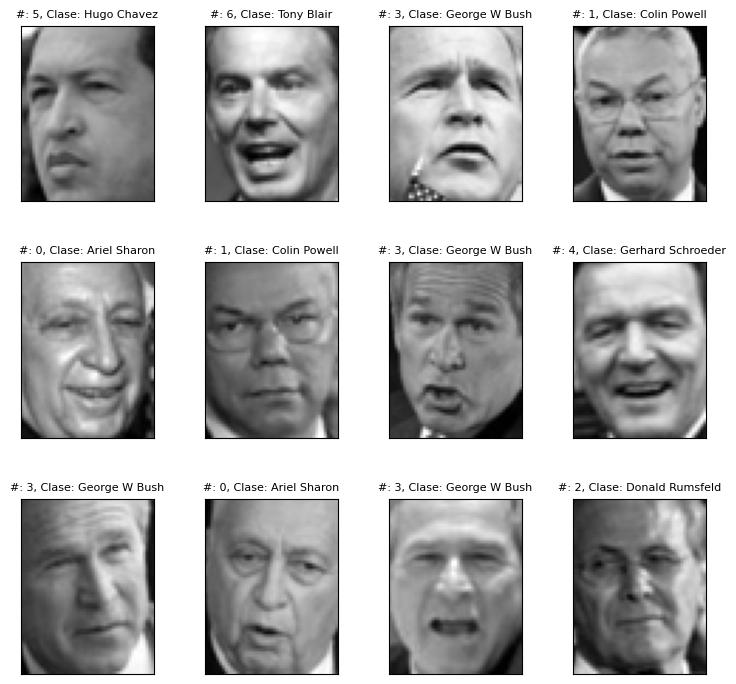

In [ ]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

## Procesamiento de los datos

In [ ]:
print(f"Rango de valores: min={X.min()}, max={X.max()}") # No hace falta normalizar

Rango de valores: min=0.0, max=1.0


In [ ]:
X.shape # 1288 entradas de 62 x 47

(1288, 62, 47)

In [ ]:
# Aplanar las imágenes (62x47 → 2914)
X_flattened = X.reshape(X.shape[0], -1)  # Ahora X_flattened tiene tamaño (1288, 2914)

In [ ]:
X_flattened.shape

(1288, 2914)

In [ ]:
# Convertir etiquetas a formato one-hot encoding
y_categorical = to_categorical(y, num_classes=len(target_names))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_categorical, test_size=0.25, random_state=42) #Me resultó mas eficiente esta división

In [ ]:
X_train.shape # Conjunto de entrenamiento

(966, 2914)

In [ ]:
X_test.shape # Conjunto de validación

(322, 2914)

In [ ]:
y_train.shape # Conjunto de entrenamiento

(966, 7)

In [ ]:
y_test.shape # Conjunto de validación

(322, 7)

## Crear el Modelo

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Capa de entrada explícita con Input
    Dense(512, activation='relu'),  # Primera capa densa con 512 neuronas
    Dropout(0.01),  # Regularización con dropout. Mejores resultados con valores pequeños. Podria tambien no usarlas.

    Dense(256, activation='relu'),  # Segunda capa densa
    Dropout(0.01),  # Dropout

    Dense(128, activation='relu'),  # Tercera capa densa
    Dropout(0.01),  # Dropout

    Dense(n_classes, activation='softmax')  # Capa de salida con softmax para clasificación multiclase
])

## Compilar el Modelo

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), # Optimizador Adam: me dió mejores resultados.El mismo se adapta mejor para datasets mas pequeños. Produce un entrenamiento más lento y estable.
              loss='categorical_crossentropy',      # Funcipon de pérdida
              metrics=['accuracy', 'mse'])          # Métricas de precisión

## Entrenar el Modelo

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=16, #Mejores resultados que con 32. Considero mas adecuado para datasets pequeños.
                    verbose=1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.3645 - loss: 1.7609 - mse: 0.1125 - val_accuracy: 0.4845 - val_loss: 1.6067 - val_mse: 0.1054
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4175 - loss: 1.6538 - mse: 0.1069 - val_accuracy: 0.4814 - val_loss: 1.4689 - val_mse: 0.0960
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4511 - loss: 1.5524 - mse: 0.1009 - val_accuracy: 0.4658 - val_loss: 1.4849 - val_mse: 0.0992
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4747 - loss: 1.4912 - mse: 0.0969 - val_accuracy: 0.4907 - val_loss: 1.3648 - val_mse: 0.0907
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4739 - loss: 1.4360 - mse: 0.0956 - val_accuracy: 0.5311 - val_loss: 1.3502 - val_mse: 0.0885
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5319 - loss: 1.3197 - mse: 0.0864 - val_accuracy: 0.5901 - val_loss: 1.2792 - val_mse: 0.0864
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/

## Evaluar el proceso de entrenamiento

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'mse', 'val_accuracy', 'val_loss', 'val_mse'])

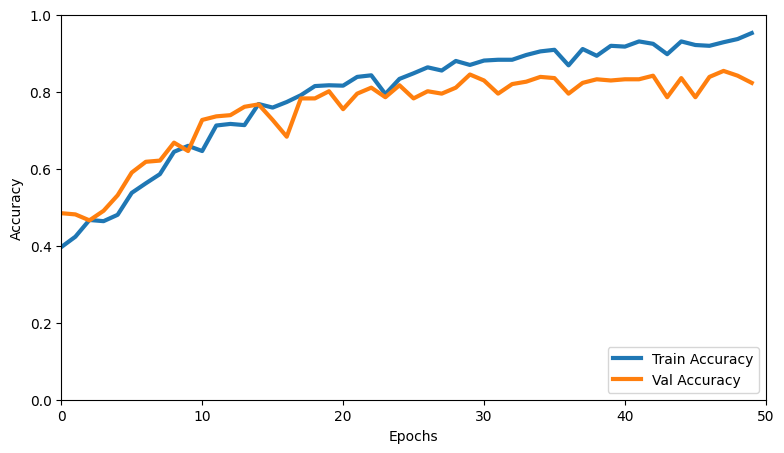

In [ ]:
f = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Ajustar el número de épocas en el eje x automáticamente
num_epochs = len(history.history['accuracy'])
plt.axis([0, num_epochs, 0, 1])

plt.legend(loc='lower right')

plt.show()

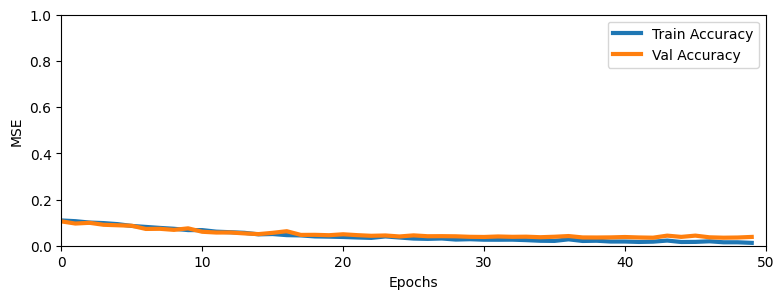

In [ ]:
f = plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
plt.plot(history.history['mse'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_mse'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')

# Ajustar el número de épocas en el eje x automáticamente
num_epochs = len(history.history['accuracy'])
plt.axis([0, num_epochs, 0, 1])

plt.legend(loc='upper right')
plt.show()

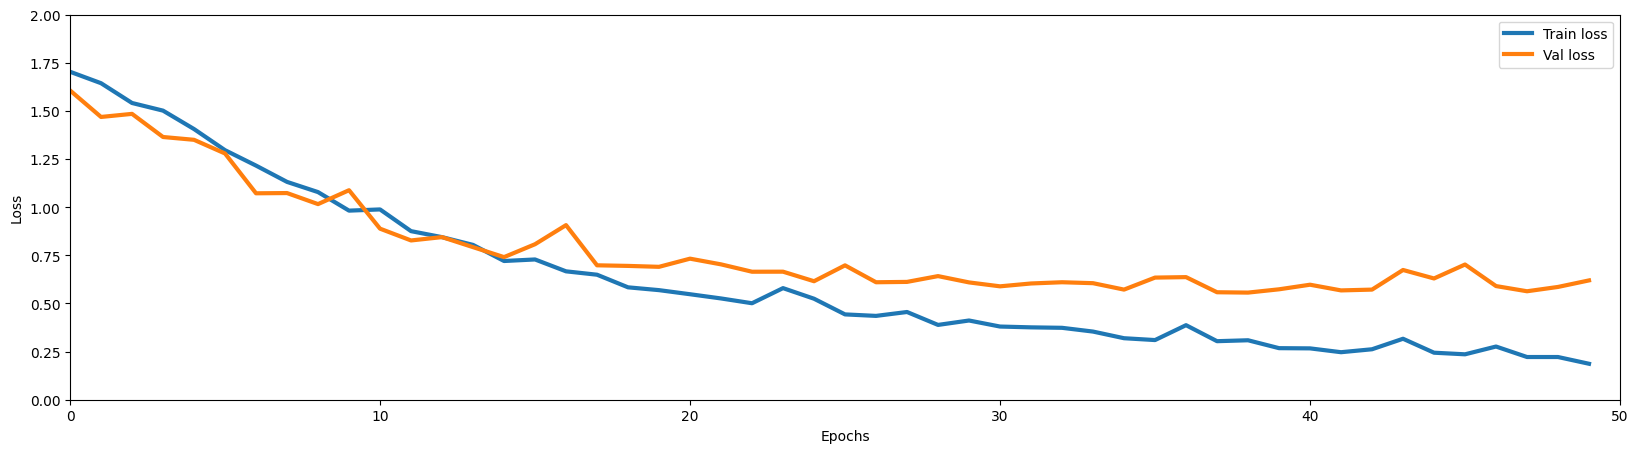

In [ ]:
f = plt.figure(figsize=(20,5))
plt.plot(history.history['loss'], linewidth=3, label='Train loss')
plt.plot(history.history['val_loss'], linewidth=3, label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Ajustar el número de épocas en el eje x automáticamente
num_epochs = len(history.history['accuracy'])
plt.axis([0, num_epochs, 0, 2])

plt.legend(loc='upper right')
plt.show()

## Predicciones y Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener las predicciones del modelo
y_pred = model.predict(X_test, verbose=1)  # Predicciones del modelo
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a clases (si la salida es one-hot)
y_true = np.argmax(y_test, axis=1)  # Etiquetas verdaderas (si la salida es one-hot)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
# 2. Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

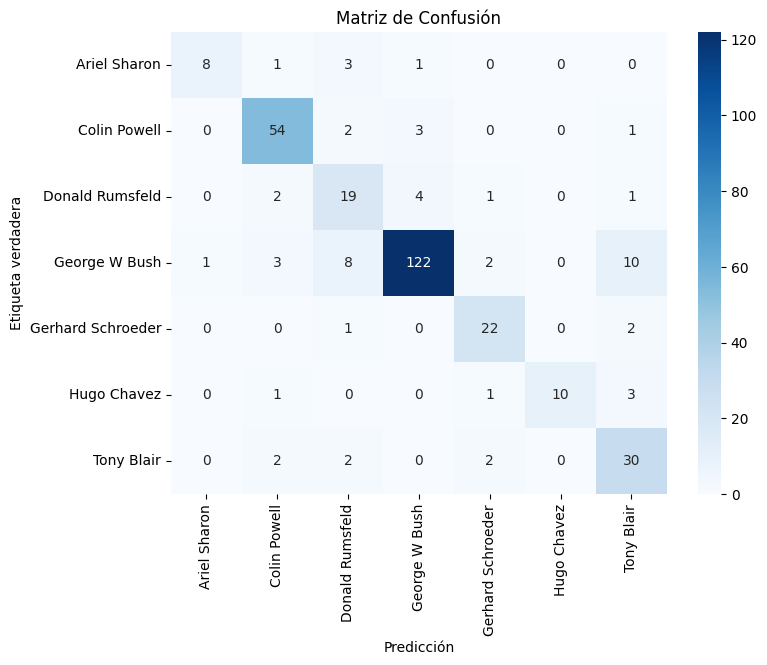

In [ ]:
# 3. Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names) # Replace class_names with target_names
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy using predicted class labels and true labels
acc = accuracy_score(y_test.argmax(axis=1), y_pred_classes)  # Added argmax(axis=1) to y_test to convert from one-hot encoding to class labels

print("Logistic Regression model accuracy (in %):", acc * 100)

Logistic Regression model accuracy (in %): 82.29813664596274


## Predicciones sobre una imagen individual

In [ ]:
x_single_test = X_train[0] # primera imagen del dataset, visualizada arriba
y_single_test = y_train[0] # primera etiqueta del dataset, visualizada arriba
x_single_test.shape = (1, x_single_test.shape[0])
y_single_test.shape = (1, y_single_test.shape[0])

In [ ]:
model.predict(x_single_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.2770442e-02, 8.9685760e-05, 4.0217972e-01, 3.3623055e-01,
        2.4465072e-01, 3.8005335e-05, 4.0410049e-03]], dtype=float32)

In [ ]:
model.evaluate(x_single_test, y_single_test,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0000e+00 - loss: 1.0900 - mse: 0.0946


[1.0899581909179688, 0.0, 0.09462455660104752]

## Comentarios

Con el metodo de optimización Adadelta tenia muchas oscilaciones, razon por la cual opté por Adam, que mejoró ese aspecto.
En la gráfica de error del conjunto de validación se notan algunas oscilaciones.
El modelo alcanzó una precisión del 95,22 % sobre el conjunto de entrenamiento y el 82,29% sobre el conjunto de validación.
Para ello se requirieron mayor cantidad de epocas que en el modelo de Redes Convolucionales.